In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

There is additional space available in the column name for some columns it needs to be treated

In [8]:
df.columns=[t.strip() for t in df.columns]

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [11]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
df = df.drop(columns=['loan_id'])

### Seperated Features(X) and labels(y) from the dataset.

In [13]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [14]:
X.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000


In [15]:
y.head(2)

0     Approved
1     Rejected
Name: loan_status, dtype: object

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 367.0+ KB


### Feature Engineering

In [17]:
# We can add all asset values together to make a single asset value
X['total_asset_value']=X['residential_assets_value']+X['commercial_assets_value']+X['luxury_assets_value']+X['bank_asset_value']

X = X.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'])

In [18]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_asset_value
0,2,Graduate,No,9600000,29900000,12,778,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,17000000
2,3,Graduate,No,9100000,29700000,20,506,57700000
3,3,Graduate,No,8200000,30700000,8,467,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,55000000


#### Encoding

In [19]:
X['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

- Extra Space available in Not graduate

In [20]:
X['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [21]:
X['education']=X['education'].str.strip()

In [22]:
X['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
X['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [24]:
X['self_employed']=X['self_employed'].str.strip()

In [25]:
X['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
y.unique()

array([' Approved', ' Rejected'], dtype=object)

In [27]:
y=y.str.strip()

In [28]:
y.unique()

array(['Approved', 'Rejected'], dtype=object)

In [29]:
# Encoding
X['education']=X['education'].map({'Not Graduate':'0','Graduate':'1'}).astype(int)
X['self_employed']=X['self_employed'].map({'No':'0','Yes':'1'}).astype(int)
y=y.map({'Rejected':'0','Approved':'1'}).astype(int)

In [30]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_asset_value
0,2,1,0,9600000,29900000,12,778,50700000
1,0,0,1,4100000,12200000,8,417,17000000
2,3,1,0,9100000,29700000,20,506,57700000
3,3,1,0,8200000,30700000,8,467,52700000
4,5,0,1,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,7400000
4265,0,0,1,3300000,11300000,20,559,20000000
4266,2,0,0,6500000,23900000,18,457,39000000
4267,1,0,0,4100000,12800000,8,780,28800000


In [31]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int32

#### Scaling

In [32]:
# log transformation
log_cols = ['income_annum','loan_amount','total_asset_value']
X[log_cols] = np.log(X[log_cols])

In [33]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_asset_value
0,2,1,0,16.077274,17.213369,12,778,17.741436
1,0,0,1,15.226498,16.316947,8,417,16.648724
2,3,1,0,16.023785,17.206658,20,506,17.870768
3,3,1,0,15.919645,17.239773,8,467,17.780126
4,5,0,1,16.097893,17.001863,20,382,17.822844


### Train Test Split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=0)

In [35]:
X_train.shape

(1280, 8)

In [36]:
X_test.shape

(2989, 8)

In [37]:
y_train.shape

(1280,)

In [38]:
y_test.shape

(2989,)

### Model Fitting

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [40]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n') 

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9195
- F1 score: 0.9196
- Precision: 0.9367
- Recall: 0.9332
- Roc Auc Score: 0.9152
----------------------------------
Model performance for Test set
- Accuracy: 0.9110
- F1 score: 0.9110
- Precision: 0.9272
- Recall: 0.9302
- Roc Auc Score: 0.9047


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9672
- F1 score: 0.9672
- Precision: 0.9768
- Recall: 0.9705
- Roc Auc Score: 0.9661


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9726
- F1 score: 0.9726
- Precision: 0.9780
- Recall: 0.9780
- Roc Auc Score: 0.9708


Gradient Boost
Model performance for Training se

**Selected Models: Gradient Boost and Random Forest**

- Gradient Boost:
1. Best test accuracy (97.09%) with minimal overfitting.
2. High performance across all metrics (F1, Precision, Recall, ROC AUC), ensuring robust generalization.
- Random Forest:
1. Very close test accuracy (96.79%) to Gradient Boost.
2. Robust and handles overfitting well with ensemble learning.
3. High Precision and Recall, making it suitable for balanced classification tasks.

Reason for Rejection:
1. Logistic Regression: Lower performance on both training and test sets.
2. Decision Tree: Overfits the data with perfect training accuracy, risking poor generalization

#### HyperParameter Tuning

In [41]:
rf_params = {'max_depth':[5,8,15,None,10],
             'max_features':[5,7,'auto',8],
             'min_samples_split':[2,8,15,20],
             'n_estimators':[100,200,500,1000]}
gb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15]
}

In [42]:
random_cv_model = [
                    ("RF",RandomForestClassifier(),rf_params),
                    ("GB",GradientBoostingClassifier(),gb_params)
]

In [44]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in random_cv_model:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
models={

    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=5, max_depth= 15),
    "Gradient Boosting":GradientBoostingClassifier(n_estimators= 100, min_samples_split= 15, max_depth= 7, learning_rate=0.2)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n') 

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9746
- F1 score: 0.9745
- Precision: 0.9760
- Recall: 0.9834
- Roc Auc Score: 0.9717


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9679
- F1 score: 0.9679
- Precision: 0.9763
- Recall: 0.9721
- Roc Auc Score: 0.9665




Given the very small difference in test accuracy and other metrics, Random Forest could be the preferred choice for its slightly better test results and higher Recall.

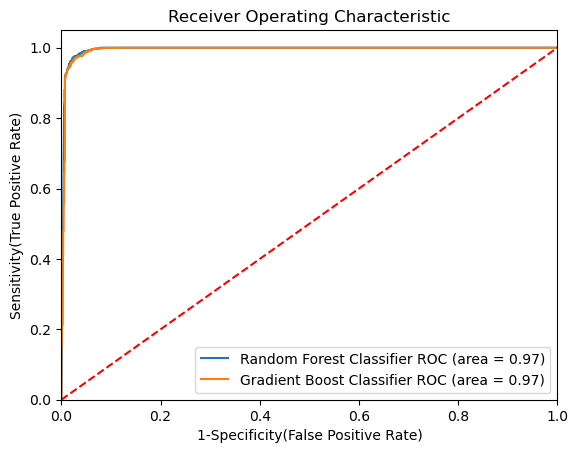

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.9717
},
{
    'label': 'Gradient Boost Classifier',
    'model': GradientBoostingClassifier(n_estimators= 100, min_samples_split= 15, max_depth= 7, learning_rate=0.2),
    'auc':  0.9665
}
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig("auc.png")
plt.show() 

Thresholds for Random Forest Classifier: [  inf 1.    0.999 0.998 0.996 0.995 0.994 0.993 0.992 0.99  0.989 0.988
 0.987 0.984 0.983 0.982 0.98  0.979 0.978 0.977 0.975 0.973 0.972 0.97
 0.969 0.967 0.962 0.959 0.957 0.955 0.953 0.947 0.946 0.942 0.939 0.938
 0.934 0.925 0.922 0.917 0.915 0.906 0.896 0.89  0.873 0.872 0.871 0.865
 0.859 0.857 0.856 0.855 0.829 0.822 0.814 0.81  0.804 0.796 0.795 0.785
 0.774 0.715 0.714 0.712 0.71  0.694 0.688 0.684 0.683 0.656 0.654 0.639
 0.638 0.635 0.633 0.63  0.629 0.628 0.617 0.616 0.608 0.598 0.596 0.593
 0.591 0.585 0.584 0.583 0.582 0.58  0.578 0.577 0.575 0.573 0.571 0.57
 0.559 0.555 0.553 0.529 0.525 0.521 0.518 0.517 0.514 0.511 0.506 0.498
 0.495 0.494 0.493 0.492 0.482 0.478 0.476 0.472 0.459 0.451 0.45  0.417
 0.416 0.415 0.41  0.408 0.407 0.403 0.4   0.397 0.396 0.392 0.364 0.321
 0.316 0.315 0.308 0.301 0.298 0.285 0.278 0.276 0.271 0.259 0.251 0.246
 0.24  0.209 0.208 0.127 0.121 0.09  0.086 0.067 0.061 0.023 0.022 0.013
 0.009 0.008

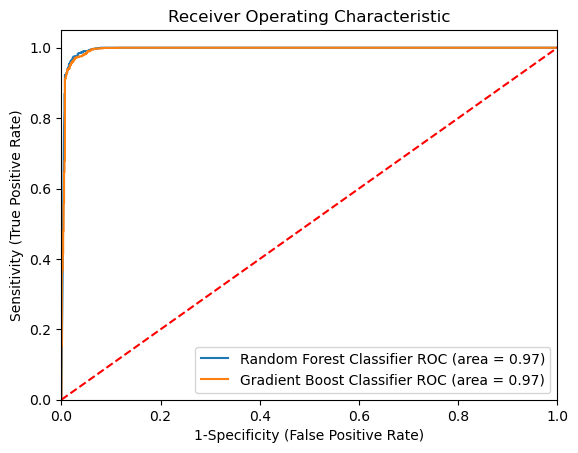

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2,
                                        max_features=7, max_depth=None),
        'auc': 0.9717
    },
    {
        'label': 'Gradient Boost Classifier',
        'model': GradientBoostingClassifier(n_estimators=100, min_samples_split=15,
                                            max_depth=7, learning_rate=0.2),
        'auc': 0.9665
    }
]

# Create loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model
    # Compute False Positive Rate, and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print the thresholds for each model
    print(f"Thresholds for {algo['label']}: {thresholds}")
    
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig("auc.png")
plt.show()


In [49]:
df_cleaned = pd.concat([X, y], axis=1)

In [ ]:
df_cleaned.to_csv('final_data.csv')